<a href="https://colab.research.google.com/github/raheelahmadguraya/Intelligent-Systems-2/blob/main/Lab2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import matplotlib
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt


# Allow matplotlib graphs to be included in notebook.
%matplotlib inline

In [ ]:
# DEFINE FUNCTIONS

# Determines the percentage of each class: 0 and 1.
# Params:
#   df - DataFrame to investigate
def percentage_of_each_class(df):
    df_row_count = len(df)  # Get total number of rows.

    df_had_cancer = df[df['chd'] == 1]
    had_cancer_count = len(df_had_cancer.index)  # Get total number of cancer cases.

    df_no_cancer = df[df['chd'] == 0]
    no_cancer_count = len(df_no_cancer.index)  # Get total number of non-cancer.

    had_cancer_percentage = (had_cancer_count / df_row_count) * 100
    no_cancer_percentage = (no_cancer_count / df_row_count) * 100
    had_cancer_percentage = round(had_cancer_percentage, 2)
    no_cancer_percentage = round(no_cancer_percentage, 2)
    print("Percentage of class 0 (no cancer):", no_cancer_percentage, "%")
    print("Percentage of class 1 (cancer):", had_cancer_percentage, "%")


# Implementation of the correlation matrix.
# Params:
#   df - DataFrame to base matrix on
def correlation_matrix(df):
    f = plt.figure(figsize=(7, 7))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=11, rotation=45)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=11)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)

    print("Feature pairs with very high correlation (around 0.8):")
    # Ignoring max correlation (1.0 squares).
    print("[typea, adiposity]\n[alcohol, adiposity]")


# Implementation of one hot encoding algorithm.
# Only executing on famhist column.
# Params:
#   df - DataFrame to work on
def one_hot_encode(df):
    famhist_encoded = pd.get_dummies(df['famhist'])  # Encoding famhist column.
    df = df.drop('famhist', axis=1)  # Drop non-encoded famhist.
    df = df.join(famhist_encoded)  # Add encoded famhist.
    return df


# Implementation of standardization function, standardize().
# Standardizes our numerical features.
# Params:
#   df - DataFrame to standardize
def standardize(df):
    for feature in (df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
                        'alcohol', 'age']]):
        mean = df[feature].mean(axis=0)  # Compute mean.
        std_dev = df[feature].std(axis=0)  # Compute standard deviation.

        # Standardize each column/row in df.
        for i in range(len(df[feature])):
            df.loc[df.index[i], feature] = (df.loc[df.index[i], feature] - mean) / std_dev


# Computation of z: z = beta_0 + beta_1*x1 + .... + beta_*xn
# Params:
#   df      - DataFrame to execute on
#   weights - DataFrame of weights to use in z calculation
def compute_log_odds(df, weights):
    rows_of_data = len(df)
    columns_of_data = len(df.columns)

    z_column = pd.DataFrame([], columns=['z value'])

    for i in range(rows_of_data):
        z = weights.iloc[0, 1]
        for j in range(columns_of_data):
            z = z + (weights.iloc[j, 1] * df.iloc[i, j])
        z_column = z_column.append({'z value': z}, ignore_index=True)

    # Append z_column to df.
    df['z value'] = z_column['z value'].to_numpy()
    print(df)


# Implementation of our hypothesis, the sigmoid activation function: sigmoid().
# Also known as the probability function, P(z) - returns probability given weights.
# Where input, z = beta_0 + beta_1*x1 + .... + beta_*xn
# Params:
#   z - log(odds), explained above
# Returns:
#   p - hypothesis (A probability value: (0, 1))
def sigmoid(z):
    p = 1 / (1 + np.exp(-z))
    return p


# Computation of p for each row in DataFrame using sigmoid().
# Params:
#   df - DataFrame to execute on
def compute_probability(df):
    rows_of_data = len(df)

    p_column = pd.DataFrame([], columns=['P value'])

    for i in range(rows_of_data):
        p = sigmoid(z=df.iloc[i, -1])
        p_column = p_column.append({'p value': p}, ignore_index=True)

    # Append z_column to df.
    df['p value'] = p_column['p value'].to_numpy()
    print(df)


# Implementation of the Binary Cross Entropy Loss function, logloss().
# Also known as Logloss.
# Params:
#   target_df   - the target DataFrame
#   features_df - the features DataFrame
# Returns:
#   e - logloss (cost/error)
def logloss(target_df, features_df):
    e = 0
    m = len(target_df)  # Equivalent to len(features_df)
    for i in range(m):
        e = e + target_df.iloc[i, -1] * np.log(features_df.iloc[i, -1]) + (1 - target_df.iloc[i, -1]) * np.log(1 - features_df.iloc[i, -1])

    return (-1/m) * e


# Implementation of Batch Gradient Descent, bgd().
# Params:
#   coefficients - DataFrame containing initial coefficients. This will be updated in the function with the new weights.
#   alpha        - Learning rate
#   target_df    - the target DataFrame
#   features_df  - the features DataFrame
#   epochs       - number of epochs to update weights
# Returns:
#   generated_errors - cumulative errors for each epoch
def batch_gradient_descent(weights, a, target_df, feature_df, epochs):
    print("Running Batch Gradient Descent...")
    # We update our coefficients DataFrame.
    rows_of_coefficients = len(weights)
    m = len(feature_df)

    summation_term = 0
    generated_errors = np.array([])

    for k in range(epochs):
        for j in range(rows_of_coefficients):
            theda_old = weights.iloc[j, 1]
            for i in range(m):
                if j == 0:
                    summation_term = summation_term + (target_df.iloc[i, -1] - feature_df.iloc[i, -1])
                else:
                    summation_term = summation_term + ((target_df.iloc[i, -1] - feature_df.iloc[i, -1]) * feature_df.iloc[i, j])
            summation_term = summation_term * (1 / m) * a
            theda_new = theda_old + summation_term
            weights['coefficient weight'].replace({weights.iloc[j, 1]: theda_new}, inplace=True)

        # Compute error, append to cumulative error array.
        feature_df = feature_df.drop(columns=['z value', 'p value'])        # Refreshing dataFeatures.

        compute_log_odds(df=feature_df, weights=weights)
        compute_probability(df=feature_df)
        error = logloss(target_df=target_df, features_df=feature_df)
        generated_errors = np.append(generated_errors, error)
        print("Epoch:", k, "/", epochs)
    return generated_errors


def mini_batch_gradient_descent(weights, a, target_df, feature_df, epochs, batch_size):
    print("Running Mini-Batch Gradient Descent...")
    # We update our coefficients DataFrame every 'batch_size' samples.
    rows_of_coefficients = len(weights)
    m = len(feature_df)

    sample_indexer = batch_size
    batch_counter = 1
    summation_term = 0
    generated_errors = np.array([])

    for k in range(epochs):
        for j in range(rows_of_coefficients):
            theda_old = weights.iloc[j, 1]
            if batch_counter > 9:
                sample_indexer = 12
            for i in range(sample_indexer):
                if j == 0:
                    summation_term = summation_term + (target_df.iloc[i, -1] - feature_df.iloc[i, -1])
                else:
                    summation_term = summation_term + ((target_df.iloc[i, -1] - feature_df.iloc[i, -1]) * feature_df.iloc[i, j])
            summation_term = summation_term * (1 / m) * a
            theda_new = theda_old + summation_term
            weights['coefficient weight'].replace({weights.iloc[j, 1]: theda_new}, inplace=True)
        sample_indexer = sample_indexer + 50
        batch_counter = batch_counter + 1

        # Compute error, append to cumulative error array.
        feature_df = feature_df.drop(columns=['z value', 'p value'])        # Refreshing dataFeatures

        compute_log_odds(df=feature_df, weights=weights)
        compute_probability(df=feature_df)
        error = logloss(target_df=target_df, features_df=feature_df)
        generated_errors = np.append(generated_errors, error)
        print("Epoch:", k, "/", epochs)
    return generated_errors

In [ ]:
# Get our data, assign it to DataFrame 'data'.
data = pd.read_csv(r"https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

Percentage of class 0 (no cancer): 65.37 %
Percentage of class 1 (cancer): 34.63 %
Index([], dtype='object')
No missing values reported.
Number of categorical variables in features: 1
Column(s): famhist
Feature pairs with very high correlation (around 0.8):
[typea, adiposity]
[alcohol, adiposity]


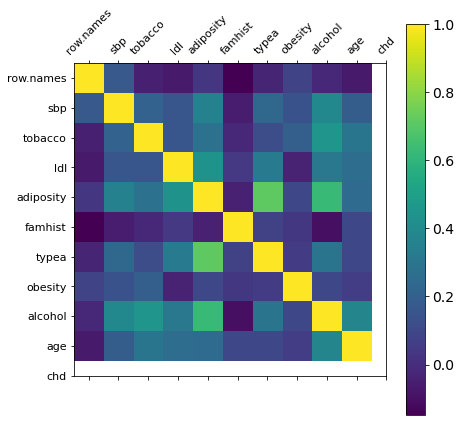

In [ ]:
# EDA Question 1: How much is the percentage of each class 0 and 1?
percentage_of_each_class(df=data)

# EDA Question 2: How many missing values do we have?
missing_values_array = data.columns[data.isnull().any()]
print(missing_values_array)
print("No missing values reported.")

# EDA Question 3: How many categorial variables do you have in your features?
data.head()  # Able to count number of categorical variables.
print("Number of categorical variables in features: 1")
print("Column(s): famhist")

# EDA Question 4: What features have the maximum correlation?
# Keeping the below in mind:
# 1 indicates a perfectly positive linear correlation between two variables.
correlation_matrix(df=data)

In [ ]:
# One-Hot-Encoding: Categorical variables
print("Our categorical features are: 'famhist'")
print("One-Hot-Encoding 'famhist'...")
data = one_hot_encode(df=data)
print(data)

Our categorical features are: 'famhist'
One-Hot-Encoding 'famhist'...
     row.names  sbp  tobacco    ldl  ...  age  chd  Absent  Present
0            1  160    12.00   5.73  ...   52    1       0        1
1            2  144     0.01   4.41  ...   63    1       1        0
2            3  118     0.08   3.48  ...   46    0       0        1
3            4  170     7.50   6.41  ...   58    1       0        1
4            5  134    13.60   3.50  ...   49    1       0        1
..         ...  ...      ...    ...  ...  ...  ...     ...      ...
457        459  214     0.40   5.98  ...   58    0       1        0
458        460  182     4.20   4.41  ...   52    1       1        0
459        461  108     3.00   1.59  ...   55    0       1        0
460        462  118     5.40  11.61  ...   40    0       1        0
461        463  132     0.00   4.82  ...   46    1       0        1

[462 rows x 12 columns]


In [ ]:
# Standardize 'data' DataFrame.
standardize(df=data)
print(data)

     row.names       sbp   tobacco       ldl  ...       age  chd  Absent  Present
0            1  1.057417  1.821099  0.477894  ...  0.628654    1       0        1
1            2  0.276789 -0.789382 -0.159507  ...  1.381617    1       1        0
2            3 -0.991731 -0.774141 -0.608585  ...  0.217947    0       0        1
3            4  1.545310  0.841352  0.806252  ...  1.039361    1       0        1
4            5 -0.211103  2.169453 -0.598928  ...  0.423301    1       0        1
..         ...       ...       ...       ...  ...       ...  ...     ...      ...
457        459  3.692037 -0.704470  0.598614  ...  1.039361    0       1        0
458        460  2.130781  0.122871 -0.159507  ...  0.628654    1       1        0
459        461 -1.479624 -0.138395 -1.521228  ...  0.834008    0       1        0
460        462 -0.991731  0.384137  3.317227  ... -0.192760    0       1        0
461        463 -0.308682 -0.791559  0.038474  ...  0.217947    1       0        1

[462 rows x 12 

In [ ]:
# Randomly initialize theda coefficients between 0 and 1 using random function.
# Store results in DataFrame: weights.
theda_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
coefficients = pd.DataFrame(theda_index, columns=['theda'])
coefficients['coefficient weight'] = coefficients['theda'].transform(lambda x: np.random.rand())

# Splitting our DataFrame.
dataFeatures = data[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'Absent', 'Present']]
dataTarget = data[['chd']]

In [ ]:
# Compute z-values for each row and append z-column to df.
compute_log_odds(df=dataFeatures, weights=coefficients)

# Compute p-values for each row and append p-column to df.
compute_probability(df=dataFeatures)

# Compute logloss for initial model.
initial_loss = logloss(target_df=dataTarget, features_df=dataFeatures)
print("\nInitial logloss:", initial_loss)

          sbp   tobacco       ldl  ...  Absent  Present   z value
0    1.057417  1.821099  0.477894  ...       0        1  6.925019
1    0.276789 -0.789382 -0.159507  ...       1        0  2.054043
2   -0.991731 -0.774141 -0.608585  ...       0        1 -0.238556
3    1.545310  0.841352  0.806252  ...       0        1  6.176983
4   -0.211103  2.169453 -0.598928  ...       0        1  4.619268
..        ...       ...       ...  ...     ...      ...       ...
457  3.692037 -0.704470  0.598614  ...       1        0  5.524464
458  2.130781  0.122871 -0.159507  ...       1        0  4.418850
459 -1.479624 -0.138395 -1.521228  ...       1        0 -1.636784
460 -0.991731  0.384137  3.317227  ...       1        0  5.349768
461 -0.308682 -0.791559  0.038474  ...       0        1  0.611124

[462 rows x 11 columns]
          sbp   tobacco       ldl  ...  Present   z value   p value
0    1.057417  1.821099  0.477894  ...        1  6.925019  0.999018
1    0.276789 -0.789382 -0.159507  ...        0

In [ ]:
# Initialize alpha and epoch arrays.
alpha = np.array([0.001, 0.0001])
epochs = np.array([500, 1000, 10000])

In [ ]:
# Batch Gradient Descent, alpha = 0.001, 500 epochs
#errors = np.array([])
#errors = batch_gradient_descent(weights=coefficients, a=alpha[0], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[0])

#f1 = plt.scatter(range(0, epochs[0]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (500 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Batch Gradient Descent, alpha = 0.001, 1000 epochs
#errors = np.array([])
#errors = batch_gradient_descent(weights=coefficients, a=alpha[0], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[1])

#f2 = plt.scatter(range(0, epochs[1]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (1000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Batch Gradient Descent, alpha = 0.001, 10000 epochs
#errors = np.array([])
#errors = batch_gradient_descent(weights=coefficients, a=alpha[0], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[2])

#f3 = plt.scatter(range(0, epochs[2]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (10000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

Streaming output truncated to the last 5000 lines.
2   -0.991731 -0.774141 -0.608585  ...        1 -0.246570  0.438668
3    1.545310  0.841352  0.806252  ...        1  6.126488  0.997821
4   -0.211103  2.169453 -0.598928  ...        1  4.599124  0.990040
..        ...       ...       ...  ...      ...       ...       ...
457  3.692037 -0.704470  0.598614  ...        0  5.462240  0.995774
458  2.130781  0.122871 -0.159507  ...        0  4.370805  0.987517
459 -1.479624 -0.138395 -1.521228  ...        0 -1.627206  0.164213
460 -0.991731  0.384137  3.317227  ...        0  5.331064  0.995184
461 -0.308682 -0.791559  0.038474  ...        1  0.610618  0.648082

[462 rows x 12 columns]
Epoch: 327 / 500
          sbp   tobacco       ldl  ...  Absent  Present   z value
0    1.057417  1.821099  0.477894  ...       0        1  6.887488
1    0.276789 -0.789382 -0.159507  ...       1        0  2.027909
2   -0.991731 -0.774141 -0.608585  ...       0        1 -0.246595
3    1.545310  0.841352  0.8062

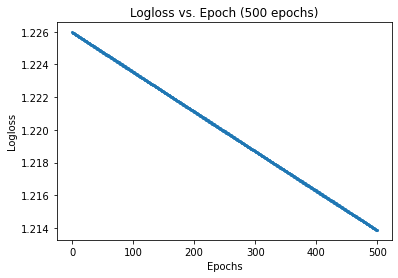

In [ ]:
#Batch Gradient Descent, alpha = 0.0001, 500 epochs
errors = np.array([])
errors = batch_gradient_descent(weights=coefficients, a=alpha[1], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[0])

f4 = plt.scatter(range(0, epochs[0]), errors, linewidths=0.1, marker='.')
plt.title('Logloss vs. Epoch (500 epochs)')
plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.show()

In [ ]:
# Batch Gradient Descent, alpha = 0.0001, 1000 epochs
#errors = np.array([])
#errors = batch_gradient_descent(weights=coefficients, a=alpha[1], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[1])

#f5 = plt.scatter(range(0, epochs[1]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (1000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Batch Gradient Descent, alpha = 0.0001, 10000 epochs
#errors = np.array([])
#errors = batch_gradient_descent(weights=coefficients, a=alpha[1], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[2])

#f6 = plt.scatter(range(0, epochs[2]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (10000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Mini-Batch Gradient Descent, alpha = 0.001, 500 epochs
#errors = mini_batch_gradient_descent(weights=coefficients, a=alpha[0], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[0], batch_size=50)

#f7 = plt.scatter(range(0, epochs[0]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (500 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Mini-Batch Gradient Descent, alpha = 0.001, 1000 epochs
#errors = mini_batch_gradient_descent(weights=coefficients, a=alpha[0], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[1], batch_size=50)

#f8 = plt.scatter(range(0, epochs[1]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (1000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Mini-Batch Gradient Descent, alpha = 0.001, 10000 epochs
#errors = mini_batch_gradient_descent(weights=coefficients, a=alpha[0], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[2], batch_size=50)

#f9 = plt.scatter(range(0, epochs[2]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (10000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Mini-Batch Gradient Descent, alpha = 0.0001, 500 epochs
#errors = mini_batch_gradient_descent(weights=coefficients, a=alpha[1], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[0], batch_size=50)

#f10 = plt.scatter(range(0, epochs[0]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (500 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Mini-Batch Gradient Descent, alpha = 0.0001, 1000 epochs
#errors = mini_batch_gradient_descent(weights=coefficients, a=alpha[1], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[1], batch_size=50)

#f11 = plt.scatter(range(0, epochs[1]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (1000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

In [ ]:
# Mini-Batch Gradient Descent, alpha = 0.0001, 10000 epochs
#errors = mini_batch_gradient_descent(weights=coefficients, a=alpha[1], target_df=dataTarget, feature_df=dataFeatures, epochs=epochs[2], batch_size=50)

#f12 = plt.scatter(range(0, epochs[2]), errors, linewidths=0.1, marker='.')
#plt.title('Logloss vs. Epoch (10000 epochs)')
#plt.xlabel('Epochs')
#plt.ylabel('Logloss')
#plt.show()

# ****************************************************
#                                                    *
# PLEASE SEE ALL GRAPHS IN REPORT - RUNTIME IS LARGE *
#                                                    *
# ****************************************************